In [1]:
import os 
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cf

from matplotlib.backends.backend_pdf import PdfPages

#### Load Correlation and RMSE data

In [2]:
# path = '/media/cide/DATOS/Trained_Models/STSF_Prediction_results/Hourly_Wind_Speed_Data/ConvLSTM'
path = os.path.join(os.getcwd(), 'experiments/01_infilling_ERA5L_010_144_2010_2019/metrics/test/maps')

maps = os.listdir(path)

print(maps)

['Corr_map_time_spain.nc', 'Corr_map_space_spain.nc', 'Corr_map_space.nc', 'RMSE_map_space.nc', 'Bias_map_space_spain.nc', 'Bias_map_time_spain.nc', 'Bias_map_space.nc', 'RMSE_map_space_spain.nc', 'Corr_map_time.nc', 'RMSE_map_time_spain.nc', 'Bias_map_time.nc', 'RMSE_map_time.nc']


In [ ]:
opt_metrics = ['Bias', 'Corr', 'RMSE']
metric = opt_metrics[0]


# path_out = os.path.join(path, model, 'metrics', split)

name_metrics_time = '{}_map_time_{}.nc'.format(metric, 'spain')
name_metrics_space = '{}_map_space_{}.nc'.format(metric, 'spain')

ds_time = xr.open_dataset(os.path.join(path, name_metrics_time))
ds_space = xr.open_dataset(os.path.join(path, name_metrics_space))

In [4]:
ds_space

<xarray.Dataset> Size: 105kB
Dimensions:               (time: 8760)
Coordinates:
  * time                  (time) datetime64[ns] 70kB 2021-01-01 ... 2021-12-3...
Data variables:
    Bias_map_space_spain  (time) float32 35kB ...

#### Load DataArrays

In [5]:
metric_time = ds_time[name_metrics_time[:-3]]

In [6]:
metric_space = ds_space[name_metrics_space[:-3]]

#### Open the PDF file

In [7]:
print(path)

/home/kevin/Escritorio/Kevin/workspace/CRAI_hourly_infilling/experiments/01_infilling_ERA5L_010_144_2010_2019/metrics/test/maps


In [8]:
pdf = PdfPages(os.path.join(path, '..', 'metric_maps', f'Metrics_maps_{metric}.pdf'))

#### Calcule basics statistics over the metrics

In [9]:
print('Shape:')
print()
print('Metrics time spain: ', metric_time.shape)
print()
print('SPACE:')
print('Metric space spain: ', metric_space.shape)

Shape:

Metrics time spain:  (144, 144)

SPACE:
Metric space spain:  (8760,)


In [10]:
print('MIN:')
print()
print('Metrics time spain: ', np.round(metric_time.min().item(), 4))
print()
print('SPACE:')
print('Metric space spain: ', np.round(metric_space.min().item(), 4))


MIN:

Metrics time spain:  -4.6401

SPACE:
Metric space spain:  -0.1188


In [11]:
print('MIN:')
print()
print('Metrics time spain: ', np.round(metric_time.max().item(), 4))
print()
print('SPACE:')
print('Metric space spain: ', np.round(metric_space.max().item(), 4))

MIN:

Metrics time spain:  3.4871

SPACE:
Metric space spain:  0.0307


In [12]:
print('MEAN:')
print()
print('Metrics time spain: ', np.round(metric_time.mean().item(), 4))
print()
print('SPACE:')
print('Metric space spain: ', np.round(metric_space.mean().item(), 4))

MEAN:

Metrics time spain:  -0.0302

SPACE:
Metric space spain:  -0.0302


In [13]:
print('STD:')
print()
print('Metrics time spain: ', np.round(metric_time.std().item(), 4))
print()
print('SPACE:')
print('Metric space spain: ', np.round(metric_space.std().item(), 4))


STD:

Metrics time spain:  0.2802

SPACE:
Metric space spain:  0.0197


In [14]:
def plot_comparison_time(data1, metric, save_as):

    mean_data1 = np.round(data1.mean(skipna=True), 4)
    std_data1 = np.round(data1.std(skipna=True), 4)

    print('Metrics_spain: ', mean_data1.values, ' +- ', std_data1.values)
    
    plt.style.use('default')
        
    #cmap = 'jet'
    cmap = 'viridis'

    #central_lon, central_lat = 11, 48
    extent = [-10.3, 5, 31, 46.4]

    fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'projection': ccrs.PlateCarree()})

    # Set up the map
    ax.set_extent(extent)
    gls = ax.gridlines(alpha=0.5, draw_labels=True, dms=True)
    gls.right_labels = False
    gls.top_labels = False
    ax.coastlines(resolution='10m')
    
    vmin, vmax = data1.min(), data1.max()
    #vmin, vmax = 0.5, 1
    
    # Plot the data
    im = ax.pcolormesh(data1.longitude, data1.latitude, data1.values, cmap=cmap, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label(label=f'{metric}', size=14, labelpad=10)
    ax.set_title(f'{metric}')
    
    if vmin == vmax:
        cbar.set_ticks([0])

    pdf.savefig()
        
    if save_as!=None: 
        plt.savefig(save_as)
    
    plt.show()
    plt.close()
    return

In [15]:
def plot_comparison_space(data1, metric, save_as):
    plt.style.use('default')
        
    mean_data1 = np.round(data1.mean(skipna=True), 4)
    std_data1 = np.round(data1.std(skipna=True), 4)

    print('Metrics_space:', mean_data1.values, ' +- ', std_data1.values)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(data1.time, data1.values)
    ax.axhline(y=mean_data1, color='r', linestyle='--', label='Mean')
    ax.set_title(label=f'{metric} over time', size=14)
    ax.set_xlabel('Date')
    ax.set_ylabel(f'{metric}')
    ax.legend()

    pdf.savefig()

    if save_as!=None: 
        plt.savefig(save_as)
    
    plt.show()
    plt.close()
    return

In [16]:
metric_map_time_path = os.path.join(path, '..', 'metric_maps', f'Metrics_maps_{metric}_time.png')
metric_map_space_path = os.path.join(path, '..', 'metric_maps', f'Metrics_maps_{metric}_space.png')

Metrics_spain:  -0.0302  +-  0.2802


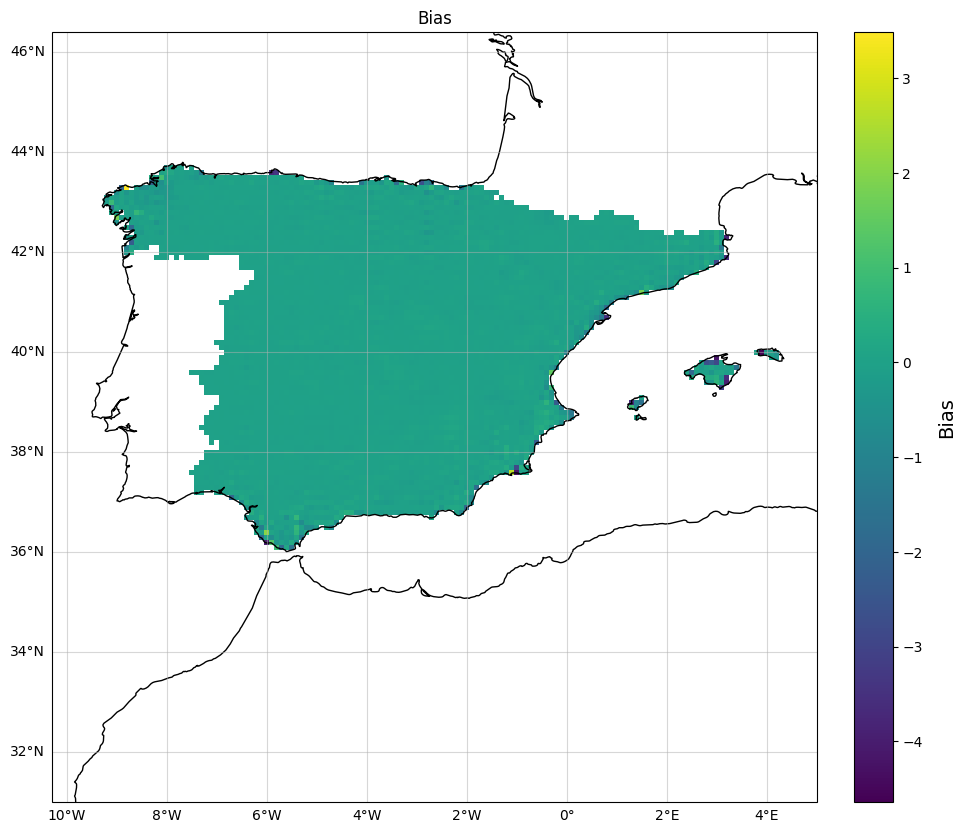

In [17]:
plot_comparison_time(data1=metric_time, metric=metric, save_as=metric_map_time_path)

Metrics_space: -0.0302  +-  0.0197


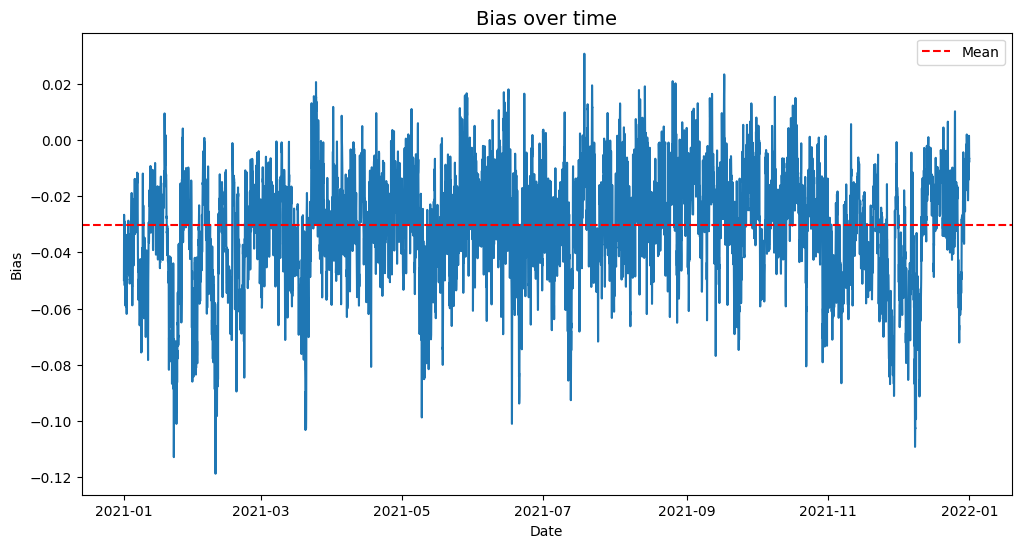

In [18]:
plot_comparison_space(data1=metric_space, metric=metric, save_as=metric_map_space_path)

In [19]:
pdf.close()